In [71]:
import sys
import pandas as pd

In [72]:
import zipfile
import os
import pandas as pd

dataset_path = "dataset"

class StockData:
    def __init__(self, stock, dataset_path):
        self.csv_path = f"{stock}_data.csv"
        self.stock = stock
        self.dataset_path = dataset_path

    def load_df(self):
        file_path = os.path.join(self.dataset_path, self.csv_path)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            return df
        else:
            print(f"File {file_path} does not exist.")
            return pd.DataFrame()  # Return an empty DataFrame if the file does not exist

# Assuming StockDataList is a list of stock names
StockDataList = [
    "AAL", "AAPL", "AAP", "ABBV", "ABC",
    "ABT", "ACN", "ADBE", "ADI", "ADM",
    "ADP", "ADSK", "ADS", "AEE", "AEP"
]

list_of_df = []
for stock in StockDataList:
    stock_data = StockData(stock, dataset_path)
    df = stock_data.load_df()
    if not df.empty:
        list_of_df.append(df)
    else:
        print(f"No data loaded for stock: {stock}")

# Check if list_of_df is still empty before concatenating
if list_of_df:
    df = pd.concat(list_of_df)
else:
    print("No dataframes to concatenate.")


# Occurence

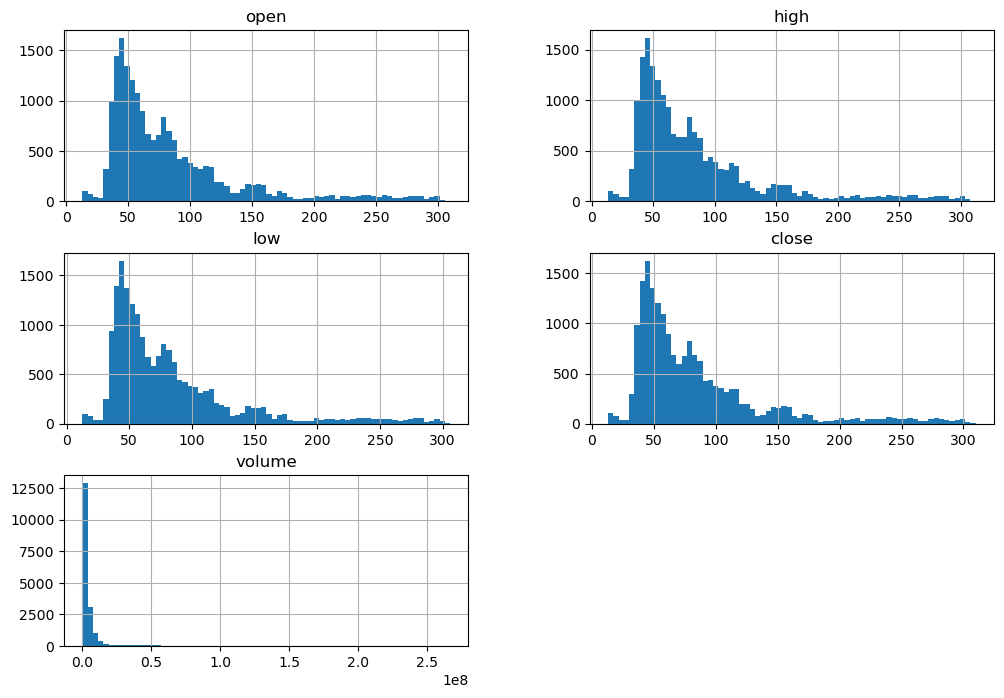

In [73]:
hist = df.hist(bins=70,figsize=(12,8))

In [74]:
df.low.mean()

82.95379017738945

In [75]:
df.high.mean()

84.5003415620863

In [76]:
print("The average of low vs average of high is ", df.high.mean() - df.low.mean())

The average of low vs average of high is  1.5465513846968548


This low of a number is a bit intresting since it shows how little change there is a day to day bases for stocks avergly

# Comparing Opening to closing price

In [77]:
df.open.mean()

83.72796955785016

In [78]:
df.close.mean()

83.7612869579031

This is expected that the closing price is higher as the stock prices on average grow over time

# Adding four columns for Exploratory reasons

In [79]:
df["Max_Margin"] =  df["high"] - df["low"]
df["Day_Margin"] = df["close"]  - df["open"]
df

,date,open,high,low,close,volume,Name,Max_Margin,Day_Margin
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,0.49,-0.32
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,0.75,-0.43
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,0.41,-0.18
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.69,0.36
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,1.80,-0.95
...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,68.74,68.98,67.66,67.84,2968573,AEP,1.32,-0.90
1255,2018-02-02,67.74,68.23,67.52,67.75,2800181,AEP,0.71,0.01
1256,2018-02-05,67.82,68.42,66.30,66.48,4146484,AEP,2.12,-1.34
1257,2018-02-06,65.45,65.87,63.94,64.91,7872392,AEP,1.93,-0.54


In [80]:
df["ROI_Max"] =  (df["high"] / df["low"] - 1)
df["Day_ROI"] = (df["close"] / df["open"] - 1)

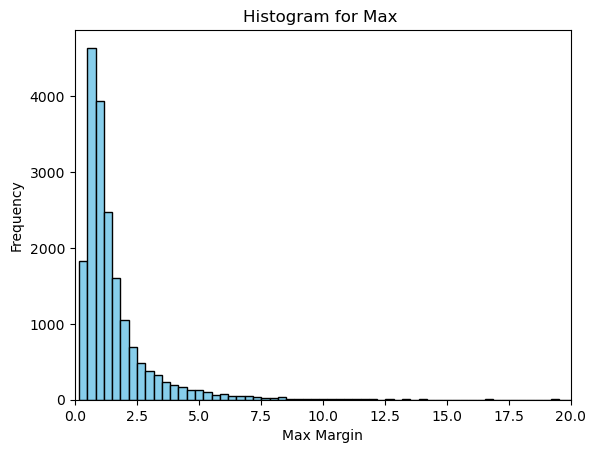

In [81]:
import matplotlib.pyplot as plt

plt.xlabel('Max Margin')
plt.ylabel('Frequency')
plt.title('Histogram for Max ')
plt.xlim(0, 20)

plt.hist(df["Max_Margin"], bins=100, color='skyblue', edgecolor='black')
plt.show()


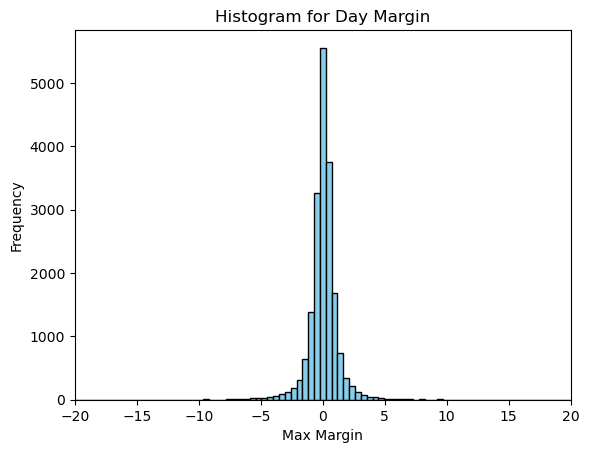

In [82]:
import matplotlib.pyplot as plt

plt.xlabel('Max Margin')
plt.ylabel('Frequency')
plt.title('Histogram for Day Margin')
plt.xlim(-20, 20)

plt.hist(df["Day_Margin"], bins=100, color='skyblue', edgecolor='black')
plt.show()

In [83]:
print(df["Max_Margin"].mean())
print(df["Day_Margin"].mean())

1.5465513846968493
0.03331740005295204


Max_margin would represent if you perfeclty timed the market vs buying at opening of a day and selling at closing. Though both methods on avg are still better than nothing is what this would mean

In [84]:
print("Max price is ", df["Max_Margin"].max())
print("Min price is ", df["Max_Margin"].min())

Max price is  33.56999999999999
Min price is  0.1700000000000017


There is a issue with the data here it shouldn't be possible for Max_Margin to be below 0 since it's calculated by subtracting low from high.

In [85]:
print("Max price is ", df["Day_Margin"].max())
print("Min price is ", df["Day_Margin"].min())

Max price is  20.04000000000002
Min price is  -27.099999999999994


# Looking into possible ROI

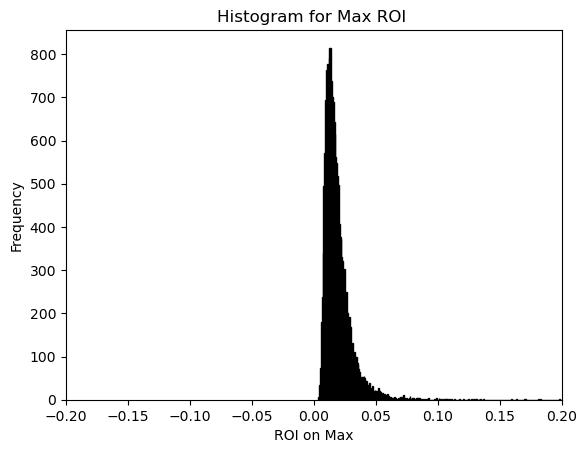

In [86]:
import matplotlib.pyplot as plt

plt.xlabel('ROI on Max')
plt.ylabel('Frequency')
plt.title('Histogram for Max ROI ')
plt.xlim(-.2, .2)

plt.hist(df["ROI_Max"], bins=300, color='skyblue', edgecolor='black')
plt.show()


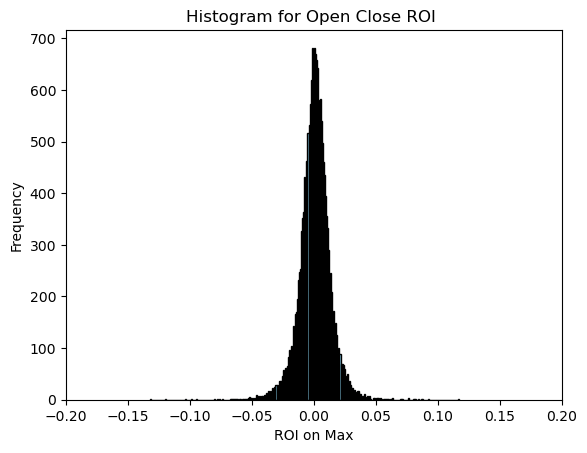

In [87]:
import matplotlib.pyplot as plt

plt.xlabel('ROI on Max')
plt.ylabel('Frequency')
plt.title('Histogram for Open Close ROI ')
plt.xlim(-.2, .2)

plt.hist(df["Day_ROI"], bins=300, color='skyblue', edgecolor='black')
plt.show()

# Correlation

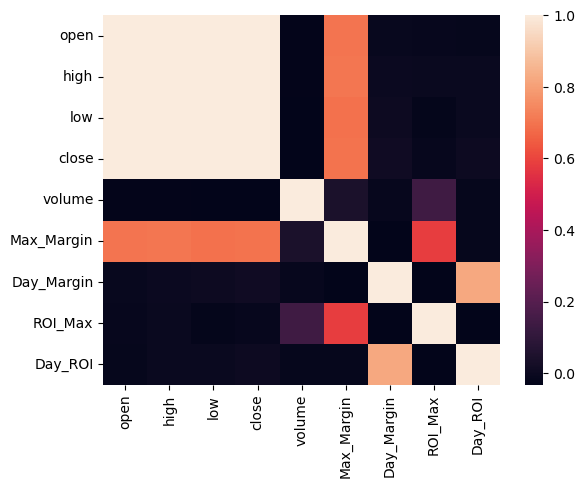

In [88]:
import seaborn as sns
sns.heatmap(df[["open","high","low","close","volume","Max_Margin","Day_Margin","ROI_Max","Day_ROI"]].corr());

The Fields that would be intresting to predict are Day_Margin, Day_ROI, Close, Low, High. Something intresting is Volume being a predicator for ROI. But most these fields have very low correlation for the ones we would know at infrence time. This would lead to the assumation that doing classifaction may not be possible though viewing as time series regression may be the best approach.

# Cleaning and Transformation

In [89]:
df.isna().any()

date          False
open          False
high          False
low           False
close         False
volume        False
Name          False
Max_Margin    False
Day_Margin    False
ROI_Max       False
Day_ROI       False
dtype: bool

Let's see how many nulls there are

In [90]:
len(df)

18885

In [91]:
df.dropna(subset=['open', "high","low", "close"], inplace=True)
df.isna().any()

date          False
open          False
high          False
low           False
close         False
volume        False
Name          False
Max_Margin    False
Day_Margin    False
ROI_Max       False
Day_ROI       False
dtype: bool

In [92]:
len(df)

18885

Since it's only 11 datapooints in the 619 thousand it's safe to just drop those 11.

# One hot encode Name

In [93]:
df['date'] = pd.to_datetime(df['date'])

df['unix_time'] = df['date'].astype('int64') // 10**9

In [94]:
df

,date,open,high,low,close,volume,Name,Max_Margin,Day_Margin,ROI_Max,Day_ROI,unix_time
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,0.49,-0.32,0.033493,-0.021234,1360281600
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,0.75,-0.43,0.052595,-0.028878,1360540800
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,0.41,-0.18,0.029078,-0.012457,1360627200
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.69,0.36,0.048421,0.025175,1360713600
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,1.80,-0.95,0.136778,-0.063588,1360800000
...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,68.74,68.98,67.66,67.84,2968573,AEP,1.32,-0.90,0.019509,-0.013093,1517443200
1255,2018-02-02,67.74,68.23,67.52,67.75,2800181,AEP,0.71,0.01,0.010515,0.000148,1517529600
1256,2018-02-05,67.82,68.42,66.30,66.48,4146484,AEP,2.12,-1.34,0.031976,-0.019758,1517788800
1257,2018-02-06,65.45,65.87,63.94,64.91,7872392,AEP,1.93,-0.54,0.030185,-0.008251,1517875200


In [95]:
df = df.drop(columns=['date'])

In [96]:
df = pd.get_dummies(df)

In [97]:
df

,open,high,low,close,volume,Max_Margin,Day_Margin,ROI_Max,Day_ROI,unix_time,...,Name_ABT,Name_ACN,Name_ADBE,Name_ADI,Name_ADM,Name_ADP,Name_ADS,Name_ADSK,Name_AEE,Name_AEP
0,15.07,15.12,14.63,14.75,8407500,0.49,-0.32,0.033493,-0.021234,1360281600,...,False,False,False,False,False,False,False,False,False,False
1,14.89,15.01,14.26,14.46,8882000,0.75,-0.43,0.052595,-0.028878,1360540800,...,False,False,False,False,False,False,False,False,False,False
2,14.45,14.51,14.10,14.27,8126000,0.41,-0.18,0.029078,-0.012457,1360627200,...,False,False,False,False,False,False,False,False,False,False
3,14.30,14.94,14.25,14.66,10259500,0.69,0.36,0.048421,0.025175,1360713600,...,False,False,False,False,False,False,False,False,False,False
4,14.94,14.96,13.16,13.99,31879900,1.80,-0.95,0.136778,-0.063588,1360800000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,68.74,68.98,67.66,67.84,2968573,1.32,-0.90,0.019509,-0.013093,1517443200,...,False,False,False,False,False,False,False,False,False,True
1255,67.74,68.23,67.52,67.75,2800181,0.71,0.01,0.010515,0.000148,1517529600,...,False,False,False,False,False,False,False,False,False,True
1256,67.82,68.42,66.30,66.48,4146484,2.12,-1.34,0.031976,-0.019758,1517788800,...,False,False,False,False,False,False,False,False,False,True
1257,65.45,65.87,63.94,64.91,7872392,1.93,-0.54,0.030185,-0.008251,1517875200,...,False,False,False,False,False,False,False,False,False,True


# Example stock price over time

In [98]:
import matplotlib.pyplot as plt

# Check the columns in the DataFrame to ensure correct naming
print(df.columns)

# Replace 'Name_XYL' with the correct column name, for example, if 'Name' is the column for stock names
stock_name = "XYL"
df_stock = df[df["Name"] == stock_name]

plt.xlabel('Unix time')
plt.ylabel('Closing Price')
plt.title(f'{stock_name} stock price over time')
plt.plot(df_stock["unix time"], df_stock["close"])
plt.show()


Index(['open', 'high', 'low', 'close', 'volume', 'Max_Margin', 'Day_Margin',
       'ROI_Max', 'Day_ROI', 'unix_time', 'Name_AAL', 'Name_AAP', 'Name_AAPL',
       'Name_ABBV', 'Name_ABC', 'Name_ABT', 'Name_ACN', 'Name_ADBE',
       'Name_ADI', 'Name_ADM', 'Name_ADP', 'Name_ADS', 'Name_ADSK', 'Name_AEE',
       'Name_AEP'],
      dtype='object')


KeyError: 'Name'

# Day ROI Over time

KeyError: 'Name_XYL'

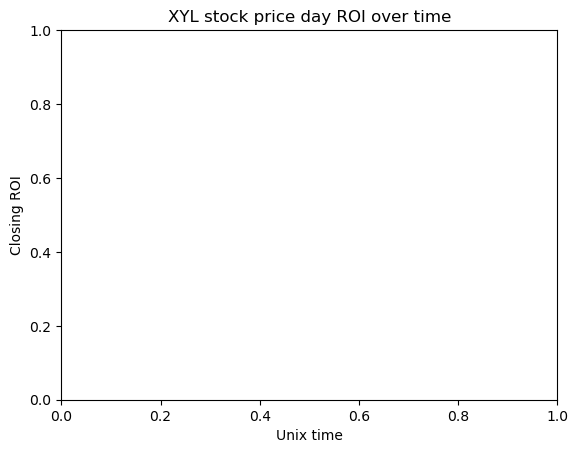

In [99]:
plt.xlabel('Unix time')
plt.ylabel('Closing ROI')
plt.title('XYL stock price day ROI over time')

plt.plot(df[df["Name_XYL"] == True]["unix_time"],df[df["Name_XYL"] == True]["Day_ROI"])

# Max ROI Over time

KeyError: 'Name_XYL'

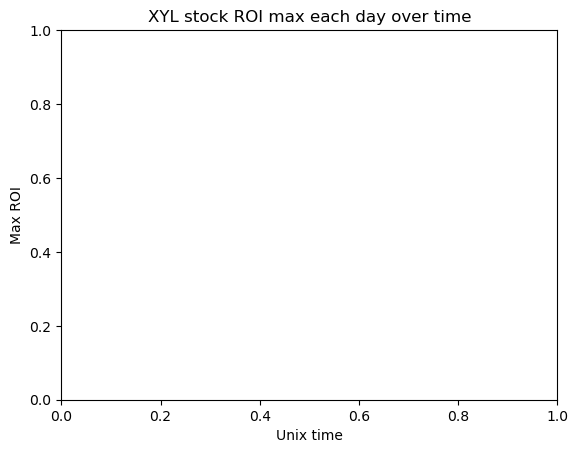

In [100]:
plt.xlabel('Unix time')
plt.ylabel('Max ROI')
plt.title('XYL stock ROI max each day over time')

plt.plot(df[df["Name_XYL"] == True]["unix_time"],df[df["Name_XYL"] == True]["ROI_Max"])

# Models

LSTM

In [101]:
!pip install tensorflow pandas numpy scikit-learn matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [102]:


import os
import pandas as pd

# Get a list of all CSV files in the target directory
csv_files = [f for f in os.listdir('dataset') if f.endswith('.csv')]

# Create an empty list to store the dataframes
dfs = []

# Iterate over the CSV files and read them into dataframes
for file in csv_files:
    df = pd.read_csv(os.path.join('dataset', file))
    dfs.append(df)

# Concatenate all the dataframes into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)

# Save the combined dataframe to a CSV file
combined_df.to_csv('dataset.csv', index=False)


In [103]:
# Load the data
data = pd.read_csv('dataset.csv')  # Replace with your file path

# Assume the data has 'Date' and 'Close' columns
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['close'].values.reshape(-1,1))

# Prepare training and test datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for LSTM
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 60
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [104]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=32, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=32, return_sequences=False))
model.add(Dense(units=16))  # Reduce units for faster training
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=2, verbose=1)



Epoch 1/2

15475/15475 [==============================] - 245s 16ms/step - loss: 2.2373e-05
Epoch 2/2
15475/15475 [==============================] - 246s 16ms/step - loss: 1.1711e-05


3868/3868 [==============================] - 25s 6ms/step


C:\Users\Nathan\AppData\Local\Temp\ipykernel_10372\2023205390.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions[:len(valid)]


Root Mean Squared Error: 2.798281340281425


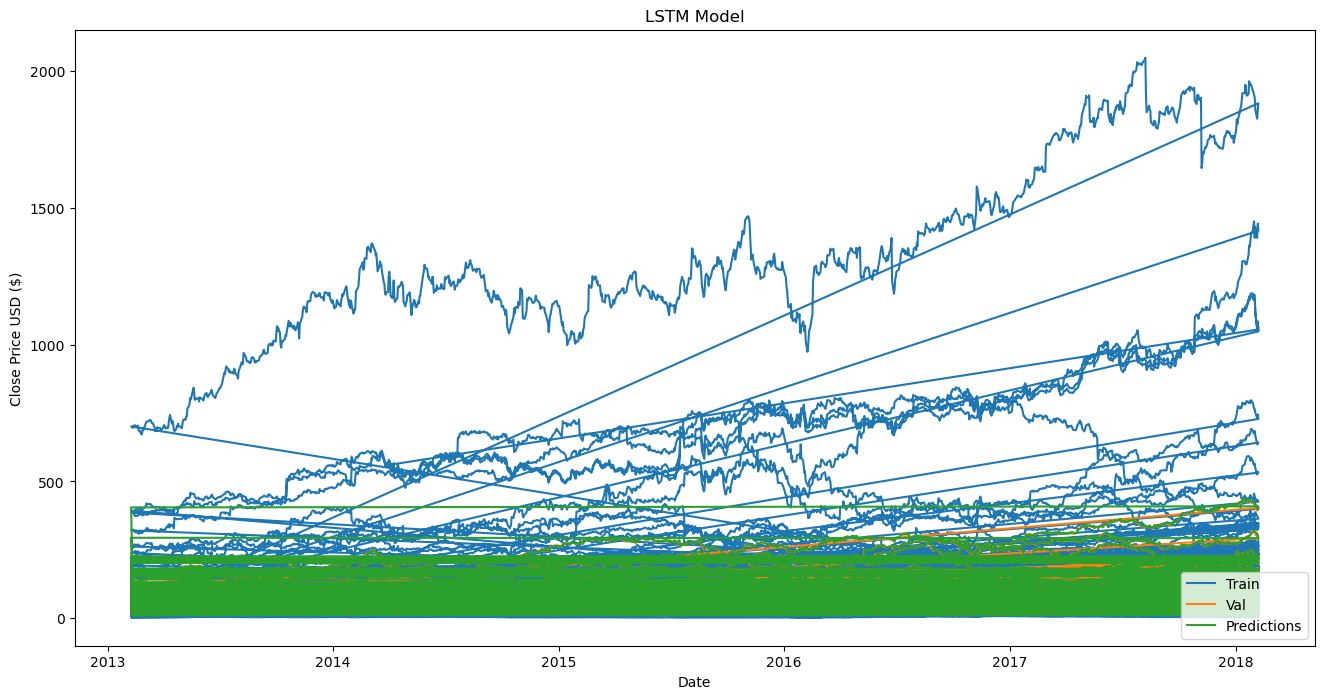

In [105]:
# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Adjust valid dataset to match the predictions length
valid = data[train_size + seq_length:]

# Ensure valid index matches the length of predictions
valid['Predictions'] = predictions[:len(valid)]

# Calculate RMSE
rmse = np.sqrt(np.mean((valid['close'].values - valid['Predictions'].values) ** 2))
print(f'Root Mean Squared Error: {rmse}')

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.title('LSTM Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(data['close'][:train_size + seq_length])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [106]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


def metrics(Y_pred, Y_true):
    print("r2 score is : ",r2_score(Y_true,Y_pred))
    

In [110]:
metrics(valid['close'].values ,valid['Predictions'].values)


r2 score is :  0.996295962606263


Support Vector Machine (SVR) Model

In [ ]:
!pip install pandas numpy scikit-learn matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [111]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

model = SVR(gamma=0.5)

In [117]:
model.fit(x_train.reshape(x_train.shape[0], -1), y_train)

SVR(gamma=0.5)

In [118]:
pred = model.predict(x_test.reshape(x_test.shape[0], -1))

In [119]:
metrics(pred, y_test)

r2 score is :  -8.310483998594092
